In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
X_train = pd.read_csv('../cleaned_datasets/X_train.csv')
X_test = pd.read_csv('../cleaned_datasets/X_test.csv')
X_valid = pd.read_csv('../cleaned_datasets/X_valid.csv')

y_train = pd.read_csv('../cleaned_datasets/y_train.csv')
y_test = pd.read_csv('../cleaned_datasets/y_test.csv')
y_valid = pd.read_csv('../cleaned_datasets/y_valid.csv')

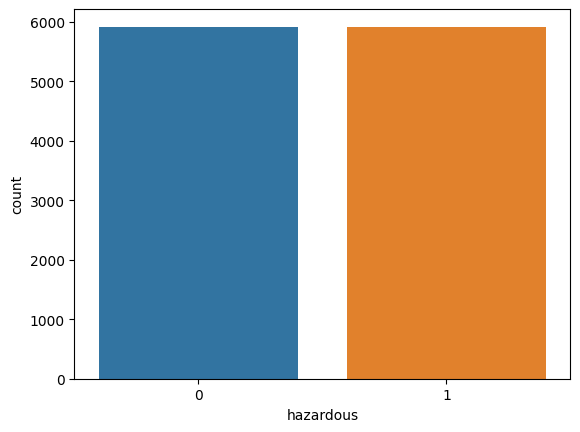

In [27]:
sns.countplot(data=y_train, x='hazardous')
plt.show()

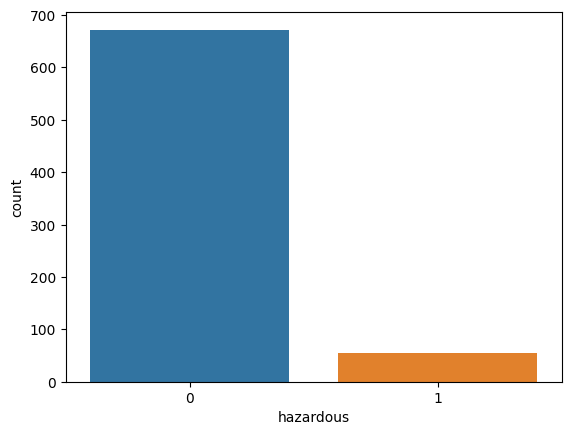

In [28]:
sns.countplot(data=y_valid, x='hazardous')
plt.show()
# validation dataset has a class imbalance for 'hazardous' unlike that in training set and this will affect model 
# performance as will be seen further

## Baseline Model:

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import  precision_score, recall_score, f1_score, roc_auc_score

baseline_model = RandomForestClassifier(random_state = 42)
baseline_model.fit(X_train, y_train.values.ravel()) #to convert y_train to NumPy array, so ravel() could be used, or else there was warning that y_train was a column vector

y_pred_baseline = baseline_model.predict(X_valid)

print("Baseline Model Accuracy: ", accuracy_score(y_valid, y_pred_baseline))
print("Baseline Confusion Matrix: ")
print(confusion_matrix(y_valid, y_pred_baseline))
print("\nBaseline Classification Report:\n", classification_report(y_valid, y_pred_baseline))
print("\nBaseline Precision Score:", precision_score(y_valid, y_pred_baseline))
print("\nBaseline Recall Score:", recall_score(y_valid, y_pred_baseline))
print("\nBaseline F1 Score:",f1_score(y_valid, y_pred_baseline))
print("\nBaseline ROC AUC Score:", roc_auc_score(y_valid, y_pred_baseline))

Baseline Model Accuracy:  0.8404401650618982
Baseline Confusion Matrix: 
[[581  91]
 [ 25  30]]

Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       672
           1       0.25      0.55      0.34        55

    accuracy                           0.84       727
   macro avg       0.60      0.71      0.63       727
weighted avg       0.90      0.84      0.87       727


Baseline Precision Score: 0.24793388429752067

Baseline Recall Score: 0.5454545454545454

Baseline F1 Score: 0.3409090909090909

Baseline ROC AUC Score: 0.7050189393939394


A brief interpretation of the scores of the baseline model:

**Accuracy**: The accuracy score is 84.04%, which means that the model is correctly classifying the instances around 84% of the time. However, accuracy can be misleading when dealing with imbalanced datasets, so it is essential to look at other metrics as well.

**Confusion Matrix**: The confusion matrix provides a detailed view of the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In this case:

    1. 581 instances were correctly classified as non-hazardous (TN).
    2. 30 instances were correctly classified as hazardous (TP).
    3. 91 instances were classified as hazardous but were actually non-hazardous (FP).
    4. 25 instances were classified as non-hazardous but were actually hazardous (FN).

**Precision**: The precision score for the positive (hazardous) class is 24.79%, which indicates that out of all the instances predicted as hazardous, only 24.79% were actually hazardous.

**Classification Report**:
1. Precision: Precision is the ratio of true positives (TP) to the sum of true positives and false positives (FP). It measures the proportion of correct positive predictions out of all positive predictions made by the model.
    1. For class 0 (non-hazardous): The model has a precision of 96%, meaning that 96% of the instances predicted as non-hazardous were indeed non-hazardous.
    2. For class 1 (hazardous): The model has a precision of 25%, meaning that only 25% of the instances predicted as hazardous were actually hazardous.
2. Recall: Recall is the ratio of true positives (TP) to the sum of true positives and false negatives (FN). It measures the proportion of actual positive instances that were correctly identified by the model.
    1. For class 0 (non-hazardous): The model has a recall of 86%, meaning that it correctly identified 86% of the non-hazardous instances.
    2. For class 1 (hazardous): The model has a recall of 55%, meaning that it correctly identified 55% of the hazardous instances.
3. F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, especially when dealing with imbalanced datasets.
    1. For class 0 (non-hazardous): The model has an F1-score of 91%, which indicates a good balance between precision and recall for the non-hazardous class.
    2. For class 1 (hazardous): The model has an F1-score of 34%, which indicates a relatively poor balance between precision and recall for the hazardous class.
4. Support: Support is the number of actual occurrences of each class in the dataset.

    1. For class 0 (non-hazardous): There are 672 instances in the dataset.
    2. For class 1 (hazardous): There are 55 instances in the dataset.

**Recall**: The recall score for the positive (hazardous) class is 55%, which indicates that out of all the actual hazardous instances, the model correctly identified 55% of them.

**F1 Score**: The F1 score for the positive (hazardous) class is 34%, which is the harmonic mean of precision and recall. It gives a balanced measure of the model's performance on the positive class, especially when there is an imbalance in the dataset.

**ROC AUC Score**: The ROC AUC score is 70.50%, which measures the model's ability to distinguish between the two classes. A score of 100% would indicate a perfect classifier, while a score of 50% means the model is no better than random guessing. A score of 70.50% suggests that the model has moderate discrimination power.

The model performs well on the non-hazardous class but struggles with the hazardous class. This is likely due to the imbalanced nature of the validation dataset, and further optimization should help improve the model's performance on the hazardous class.

## Hyperparamter Tuning using GridSearchCV:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

In [ ]:
best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

In [ ]:
tuned_model = RandomForestClassifier(random_state = 42, max_depth = None, min_samples_split = 2, 
                                     n_estimators = 50, min_samples_leaf = 1)

tuned_model.fit(X_train, y_train.values.ravel())

y_pred_tuned = tuned_model.predict(X_valid)

print("Tuned Model Accuracy: ", accuracy_score(y_valid, y_pred_tuned))
print("Tuned Confusion Matrix: ")
print(confusion_matrix(y_valid, y_pred_tuned))
print("\nTuned Classification Report:\n", classification_report(y_valid, y_pred_tuned))
print("\nTuned Precision Score:", precision_score(y_valid, y_pred_tuned))
print("\nTuned Recall Score:", recall_score(y_valid, y_pred_tuned))
print("\nTuned F1 Score:",f1_score(y_valid, y_pred_tuned))
print("\nTuned ROC AUC Score:", roc_auc_score(y_valid, y_pred_tuned))


After tuning the model, here's how the model's performance has changed:

**Accuracy**: The accuracy has increased slightly from 84.04% to 84.59%. This is a minor improvement, but it's worth noting.

**Confusion Matrix**: The number of true positives (TP) and true negatives (TN) has increased, while the number of false positives (FP) has decreased. The number of false negatives (FN) remains the same.

**Precision**:
   1. For class 0 (non-hazardous): The precision remains the same at 96%.
   2. For class 1 (hazardous): The precision has increased slightly from 25% to 25.64%.

**Recall**:
   1. For class 0 (non-hazardous): The recall has increased slightly from 86% to 87%.
   2. For class 1 (hazardous): The recall remains the same at 55%.

**F1-score**:
   1. For class 0 (non-hazardous): The F1-score remains the same at 91%.
   2. For class 1 (hazardous): The F1-score has increased slightly from 34% to 35%.

**ROC AUC Score**: The ROC AUC score has increased slightly from 70.50% to 70.80%.

Overall, the tuned model has shown minor improvements in performance compared to the baseline model. The model still performs well on the non-hazardous class but struggles with the hazardous class. Further optimization or trying different algorithms might help improve the model's performance on the hazardous class.